In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

#Load the Data
df = pd.read_csv("Classified Data.txt", delimiter=',')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                test_size=0.30)

In [4]:
## Using KNN
#Remember that we are trying to come up with a model to predict whether someone 
#will TARGET CLASS or not. We'll start with k=1.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
           

pred = knn.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[138  12]
 [ 17 133]]


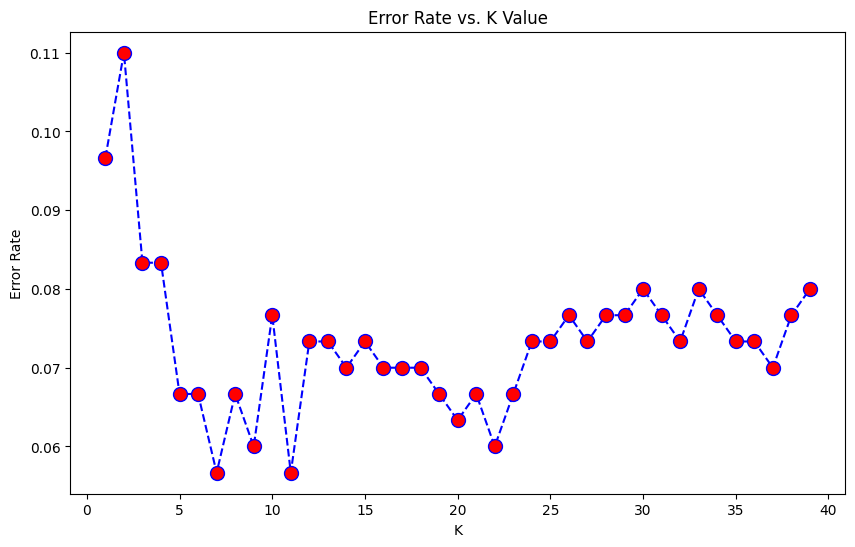

In [8]:
error_rate = []


# Will take some time

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')
plt.show()

In [21]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,pred))
print('\nClassification Report:')
print(classification_report(y_test,pred))


WITH K=1

Confusion Matrix:
[[138  12]
 [ 17 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       150
           1       0.92      0.89      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [19]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,pred))
print('\nClassification Report:')
print(classification_report(y_test,pred))

WITH K=23

Confusion Matrix:
[[137  13]
 [  7 143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       150
           1       0.92      0.95      0.93       150

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

